In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import os
from warnings import filterwarnings ; filterwarnings('ignore')

### Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
os.chdir('InsuranceDataSet/')

In [3]:
claims= pd.read_csv('claims.csv')
cust=pd.read_csv('cust_demographics.csv')


In [4]:
cust

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [5]:
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [6]:
cust_claims=claims.merge(cust,left_on=['customer_id'],right_on=['CUST_ID'],how='inner')
cust_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [7]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

### Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [8]:
 cust_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [9]:
num_col=cust_claims.select_dtypes(include=['float64','int64'])
obj_col=cust_claims.select_dtypes(include=['object'])

In [10]:
num_col

,claim_id,customer_id,total_policy_claims,CUST_ID
0,54004764,21868593,1.0,21868593
1,33985796,75740424,3.0,75740424
2,53522022,30308357,1.0,30308357
3,63017412,30308357,6.0,30308357
4,13015401,47830476,1.0,47830476
...,...,...,...,...
1080,62020796,79539873,1.0,79539873
1081,63269067,42364152,1.0,42364152
1082,22690595,19888166,2.0,19888166
1083,12376894,11256802,4.0,11256802


In [11]:
obj_col

,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,Driver error,11/27/2017,Auto,No,Material only,$2980,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,Crime,10/03/2018,Home,Unknown,Material only,$2980,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,Driver error,04/04/2018,Auto,No,Material only,$1950,No,Female,11-Mar-84,TN,798-631-4758,Silver
4,Natural causes,06/17/2018,Auto,No,Material only,$1680,No,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,No,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,Other causes,05/09/2017,Home,No,Material only,$2800,No,Female,07-Jul-96,ID,529-462-1635,Silver
1082,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,No,Male,11-Apr-90,WI,712-651-9613,Gold
1083,Other driver error,04/18/2017,Auto,No,Material only,$2840,No,Female,22-Oct-64,LA,469-345-5617,Silver


In [12]:
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max'])

In [13]:
def categorical_var_summary( x ):
    
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100 / x.count(), 2)], 
                     
                  index = ['n', 'nmiss', 'MODE', 'FREQ', 'PERCENT'])

In [14]:
num_audit=num_col.apply(lambda x : continuous_var_summary(x))
num_audit

,claim_id,customer_id,total_policy_claims,CUST_ID
dtype,int64,int64,float64,int64
cardinality,1085,1078,8,1078
n_tot,1085,1085,1085,1085
n,1085,1085,1075,1085
nmiss,0,0,10,0
perc_miss,0.0,0.0,0.921659,0.0
sum,53073348315,55083176211,1706.0,55083176211
mean,48915528.400922,50767904.341935,1.586977,50767904.341935
std,29128181.617819,28496245.372373,1.146859,28496245.372373
var,848450964360648.625,812036000322492.625,1.315286,812036000322492.625


In [15]:
categorical_audit=obj_col.apply(lambda x :categorical_var_summary(x))
categorical_audit

,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,fraudulent,gender,DateOfBirth,State,Contact,Segment
n,1085,1085,1085,1085,1085,1020,1085,1085,1085,1085,1085,1085
nmiss,0,0,0,0,0,65,0,0,0,0,0,0
MODE,Other causes,04/04/2018,Auto,No,Material only,$2320,No,Male,18-Oct-72,NY,743-569-4783,Gold
FREQ,285,18,970,621,653,7,838,556,2,31,2,375
PERCENT,26.27,1.66,89.4,57.24,60.18,0.69,77.24,51.24,0.18,2.86,0.18,34.56


In [16]:
cust_claims["DateOfBirth"] = pd.to_datetime(cust_claims.DateOfBirth, format = "%d-%b-%y")
cust_claims.loc[(cust_claims.DateOfBirth.dt.year > 2020),"DateOfBirth"]=cust_claims[cust_claims.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))

In [17]:
cust_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,1964-10-22,LA,469-345-5617,Silver


In [18]:
cust_claims["claim_date"] = pd.to_datetime(cust_claims.claim_date, format = "%m/%d/%Y")
cust_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,$2800,1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,$2840,4.0,No,11256802,Female,1964-10-22,LA,469-345-5617,Silver


### Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [19]:
cust_claims["claim_amount"]= cust_claims['claim_amount'].astype(str)
cust_claims['claim_amount'] = cust_claims['claim_amount'].str.replace('$','')
cust_claims['claim_amount']= np.where(cust_claims.claim_amount== "nan","",cust_claims.claim_amount )

In [20]:
cust_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770,1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800,1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080,2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840,4.0,No,11256802,Female,1964-10-22,LA,469-345-5617,Silver


In [21]:
cust_claims['claim_amount'] = pd.to_numeric(cust_claims['claim_amount'])
np.dtype(cust_claims.claim_amount)

dtype('float64')

In [22]:
cust_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,1964-10-22,LA,469-345-5617,Silver


### Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [23]:
cust_claims['unreported_claims']=np.where(cust_claims.police_report=='Unknown',1,0)

In [24]:
cust_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,0
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold,0
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,1964-10-22,LA,469-345-5617,Silver,0


### One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. 
Retain the most recent observation and delete any duplicated records in
the data based on the customer ID column.

In [25]:
cust_claims= cust_claims.drop_duplicates(subset="customer_id", keep= "last")
cust_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,1
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,0
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold,0
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,1964-10-22,LA,469-345-5617,Silver,0


### Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [26]:
cust_claims.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
unreported_claims       0
dtype: int64

In [27]:
cust_claims["claim_amount"]= cust_claims['claim_amount'].replace(np.NaN,cust_claims['claim_amount'].mean())
cust_claims["claim_amount"].isna().sum()

0

In [28]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1084
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1078 non-null   int64         
 1   customer_id          1078 non-null   int64         
 2   incident_cause       1078 non-null   object        
 3   claim_date           1078 non-null   datetime64[ns]
 4   claim_area           1078 non-null   object        
 5   police_report        1078 non-null   object        
 6   claim_type           1078 non-null   object        
 7   claim_amount         1078 non-null   float64       
 8   total_policy_claims  1068 non-null   float64       
 9   fraudulent           1078 non-null   object        
 10  CUST_ID              1078 non-null   int64         
 11  gender               1078 non-null   object        
 12  DateOfBirth          1078 non-null   datetime64[ns]
 13  State                1078 non-nul

In [29]:
cust_claims["total_policy_claims"] = cust_claims['total_policy_claims'].fillna(cust_claims['total_policy_claims'].mode()[0])

In [30]:
cust_claims["total_policy_claims"]= cust_claims["total_policy_claims"].astype(str)

In [31]:
cust_claims["total_policy_claims"].isna().sum()

0

### Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60

In [34]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(cust_claims['DateOfBirth']).year          #extract year from DateOfBirth
x = dob_year-100                                               # for the years which belongs to 60's
v = curr_year - x
y = curr_year - dob_year
cust_claims['age'] = (np.where(dob_year > curr_year,v,y))


#Categorising
cust_claims.loc[(cust_claims.age < 18),'AgeGroup'] = 'Children'
cust_claims.loc[(cust_claims.age >=18) & (cust_claims.age <30),'AgeGroup'] = 'Youth'
cust_claims.loc[(cust_claims.age >=30) & (cust_claims.age <60),'AgeGroup'] = 'Adult'
cust_claims.loc[(cust_claims.age >=60),'AgeGroup'] = 'Senior'

In [35]:
cust_claims.head(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims,age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,43,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1,52,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0,38,Adult
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,1,36,Adult
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0,45,Adult
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,21831191,Male,1977-05-17,NH,419-712-8513,Gold,1,45,Adult
10,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412,Male,1999-03-02,AR,752-398-2914,Gold,0,23,Youth
11,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606,Male,1999-10-25,AK,256-968-9172,Silver,0,23,Youth
12,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689,Male,1993-10-12,ID,142-324-7481,Silver,1,29,Youth
13,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,33507197,Female,1966-09-09,RI,165-519-4583,Gold,0,56,Adult


In [36]:
cust_claims.groupby(["AgeGroup"])["age"].count()

AgeGroup
Adult     795
Senior     75
Youth     208
Name: age, dtype: int64

### What is the average amount claimed by the customers from various segments?

In [37]:
avg_amt_segment= round(cust_claims.groupby(["Segment"])["claim_amount"].mean(),2)
avg_amt_segment

Segment
Gold        12846.39
Platinum    12371.64
Silver      12267.15
Name: claim_amount, dtype: float64

### What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [38]:
amt_incedent= round(cust_claims.loc[cust_claims.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("total_"),2)
amt_incedent

incident_cause
total_Crime                  721937.45
total_Driver error          3315847.88
total_Natural causes        1312744.91
total_Other causes          3723147.30
total_Other driver error    3277533.37
Name: claim_amount, dtype: float64

### How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [39]:
cust_claims.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact',
       'Segment', 'unreported_claims', 'age', 'AgeGroup'],
      dtype='object')

In [41]:
adults_claims_count= cust_claims.loc[(cust_claims.incident_cause.str.lower().str.contains("driver") & (cust_claims.State== "TX") | (cust_claims.State== "DE") | (cust_claims.State== "AK")) ].groupby(["State"])["claim_amount"].count()
adults_claims_count

State
AK    19
DE    29
TX    10
Name: claim_amount, dtype: int64

### Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [43]:
claim_gender_segment= round(cust_claims.groupby(["Segment", "gender"])["claim_amount"].sum().reset_index(),2)
claim_gender_segment

,Segment,gender,claim_amount
0,Gold,Female,2110042.41
1,Gold,Male,2655966.87
2,Platinum,Female,2369720.43
3,Platinum,Male,2096443.42
4,Silver,Female,1897301.87
5,Silver,Male,2347130.84


In [44]:
claim_gender_segment_pivot= claim_gender_segment.pivot(index="Segment", columns= "gender", values= "claim_amount")
claim_gender_segment_pivot

gender,Female,Male
Segment,,
Gold,2110042.41,2655966.87
Platinum,2369720.43,2096443.42
Silver,1897301.87,2347130.84


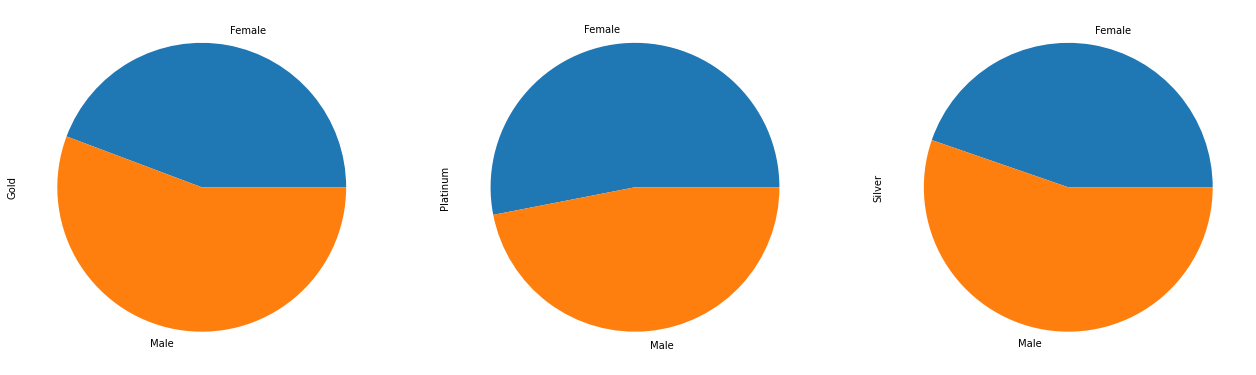

In [46]:
claim_gender_segment_pivot.T.plot(kind="pie", subplots= True, legend= False,figsize=(22,12))
plt.show()

### Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [47]:
claim_gender_driver= cust_claims.loc[(cust_claims.incident_cause.str.lower().str.contains("driver"))].groupby(["gender"])[["gender"]].count().add_prefix("countOf_").reset_index()
claim_gender_driver

,gender,countOf_gender
0,Female,221
1,Male,281


[]

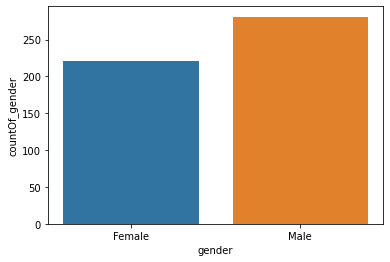

In [49]:
sns.barplot(x= "gender", y= "countOf_gender", data= claim_gender_driver)
plt.plot()
#Male gender had claimed the most for any type of driver related issues

### Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [51]:
cust_claims["Frauds"]= np.where(cust_claims.fraudulent == "Yes",1,0)
cust_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims,age,AgeGroup,Frauds
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,43,Adult,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1,52,Adult,0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0,38,Adult,0
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,1,36,Adult,0
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0,45,Adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,0,41,Adult,0
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver,0,26,Youth,0
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold,0,32,Adult,0
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,1964-10-22,LA,469-345-5617,Silver,0,58,Adult,0


In [52]:
agegroup_max_frauds= cust_claims.groupby(["AgeGroup"])["Frauds"].sum().reset_index()
agegroup_max_frauds

,AgeGroup,Frauds
0,Adult,185
1,Senior,21
2,Youth,39


[]

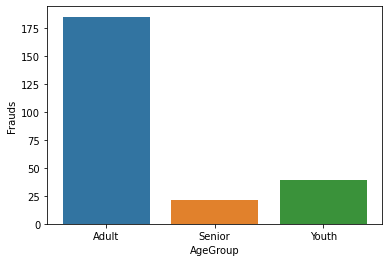

In [54]:
sns.barplot(x= "AgeGroup", y="Frauds", data=agegroup_max_frauds )
plt.plot()

### Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [55]:
cust_claims['claim_month'] = pd.to_datetime(cust_claims['claim_date'])
cust_claims['Claim_month'] = cust_claims['claim_month'].dt.month

In [57]:
cust_claims.head(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,...,DateOfBirth,State,Contact,Segment,unreported_claims,age,AgeGroup,Frauds,claim_month,Claim_month
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,...,1979-01-12,VT,789-916-8172,Platinum,0,43,Adult,0,2017-11-27,11
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,...,1970-01-13,ME,265-543-1264,Silver,1,52,Adult,0,2018-10-03,10
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,...,1984-03-11,TN,798-631-4758,Silver,0,38,Adult,0,2018-04-04,4
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,...,1986-05-01,MA,413-187-7945,Silver,1,36,Adult,0,2017-04-12,4
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,...,1977-05-13,NV,956-871-8691,Gold,0,45,Adult,0,2018-09-26,9
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,...,1977-05-17,NH,419-712-8513,Gold,1,45,Adult,0,2018-02-09,2
10,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,...,1999-03-02,AR,752-398-2914,Gold,0,23,Youth,0,2018-01-13,1
11,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,...,1999-10-25,AK,256-968-9172,Silver,0,23,Youth,0,2018-04-10,4
12,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,...,1993-10-12,ID,142-324-7481,Silver,1,29,Youth,0,2018-02-15,2
13,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,...,1966-09-09,RI,165-519-4583,Gold,0,56,Adult,1,2017-07-22,7


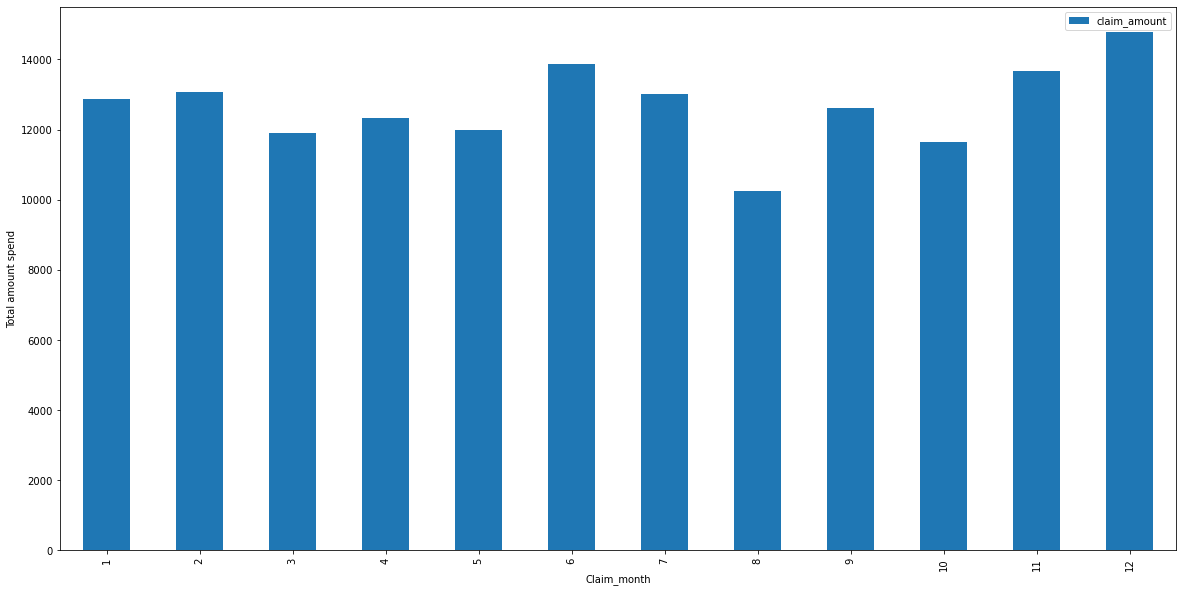

In [60]:
pd.pivot_table(cust_claims,index="Claim_month",values="claim_amount").plot(kind='bar',figsize=(20,10))
plt.ylabel('Total amount spend')
plt.show()

### What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [61]:
frauds_amount_gender= pd.DataFrame(cust_claims.loc[(cust_claims.fraudulent=="Yes")].groupby(["gender","AgeGroup"])[["claim_amount"]].mean().add_prefix("Fraud_"))
non_frauds_amount_gender=pd.DataFrame(cust_claims.loc[(cust_claims.fraudulent=="No")].groupby(["gender","AgeGroup"])[["claim_amount"]].mean().add_prefix("Non_Fraud_"))

In [62]:
frauds_amount_gender

Fraud_claim_amount
gender AgeGroup                    
Female Adult           12630.098218
       Senior           3779.076923
       Youth            9220.450407
Male   Adult           16049.169551
       Senior          16879.125000
       Youth            7799.610535

In [63]:
non_frauds_amount_gender

Non_Fraud_claim_amount
gender AgeGroup                        
Female Adult               11982.026657
       Senior              14965.372409
       Youth               13174.536397
Male   Adult               12375.020071
       Senior              12607.765976
       Youth               12089.533384

In [64]:
claims_age_gender=round(pd.merge(frauds_amount_gender,non_frauds_amount_gender, on=["gender","AgeGroup"]),2)
claims_age_gender


Fraud_claim_amount  Non_Fraud_claim_amount
gender AgeGroup                                            
Female Adult               12630.10                11982.03
       Senior               3779.08                14965.37
       Youth                9220.45                13174.54
Male   Adult               16049.17                12375.02
       Senior              16879.12                12607.77
       Youth                7799.61                12089.53

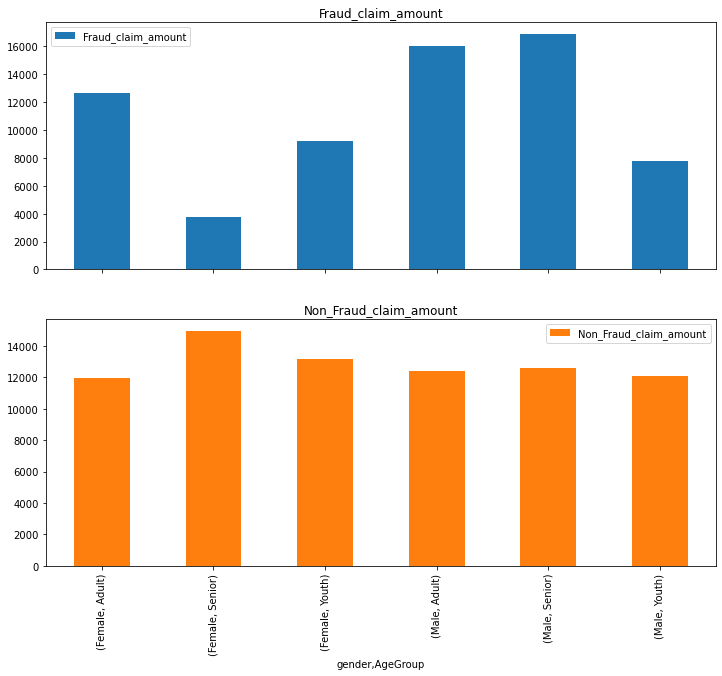

In [65]:
claims_age_gender.plot(kind="bar", subplots= True, legend= True,figsize=(12,10))
plt.show()

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

#### Is there any similarity in the amount claimed by males and females?

In [66]:
claim_male = cust_claims['claim_amount'].loc[cust_claims['gender']=="Male"]
claim_female = cust_claims['claim_amount'].loc[cust_claims['gender']=="Female"]

In [71]:
print("The average amount claimed by males is {}".format(claim_male.mean()))
print("The average amount claimed by females is {}".format(claim_female.mean()))

The average amount claimed by males is 12884.829631308425
The average amount claimed by females is 12100.692029236623


In [72]:
import scipy.stats as stats
#checking the variance

eq_var = stats.ttest_ind(a= claim_male,b= claim_female,equal_var=True)    # equal variance
eq_var.statistic

0.9630529881732577

In [73]:
uneq_var = stats.ttest_ind(a= claim_male,b= claim_female,equal_var=False)    # UnEqual variance
uneq_var.statistic

#Note -> The t score of the variables is very similar thus we will consider it as equal variance

0.9637241707490979

In [75]:
t= eq_var.statistic
p= eq_var.pvalue
print("For the above test, the t-score is {} and the p-value is {}".format(t,p))
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

For the above test, the t-score is 0.9630529881732577 and the p-value is 0.3357373087404285
We fail to reject null hypothesis


In [ ]:
# As the significance value of t test is greater than 0.05 we can safely conclude that there is a similarity in amount claimed by males and females.

### Is there any relationship between age category and segment?

In [ ]:
# To find out this relationship we will use Chi Square test
# H0= No relation between category and segment;
# Ha= There is a relationship between category and segment

In [69]:
agecat_seg = pd.crosstab(cust_claims.AgeGroup, cust_claims.Segment, margins = True)
agecat_seg

Segment,Gold,Platinum,Silver,All
AgeGroup,,,,
Adult,272,266,257,795
Senior,28,26,21,75
Youth,71,69,68,208
All,371,361,346,1078


In [76]:
chi_test = stats.chi2_contingency(observed= agecat_seg)
chi_test

(0.6654696397990999,
 0.999896981610665,
 9,
 array([[ 273.6038961 ,  266.22912801,  255.16697588,  795.        ],
        [  25.81168831,   25.11595547,   24.07235622,   75.        ],
        [  71.58441558,   69.65491651,   66.7606679 ,  208.        ],
        [ 371.        ,  361.        ,  346.        , 1078.        ]]))

In [79]:
print("The chi square stat is {} and the p value is {}".format(chi_test[0],chi_test[1]))

The chi square stat is 0.6654696397990999 and the p value is 0.999896981610665


In [80]:
# Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis. 
#Therefore there is no relationship between age category and segment

### The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [81]:
# Here we will check the pearson coeffecient.
# The H0=  No relationship between the 2016-17 claim amounts and current claim amounts,
# Ha= Retionship exists;
# the CI= 95%, p=0.05

In [82]:
cust_claims["Year"]= cust_claims['claim_month'].dt.year

In [84]:
#current year as per the data given in 2018
current_year= cust_claims.loc[cust_claims.Year == 2018]["claim_amount"]
amt_2016_17= cust_claims.loc[cust_claims.Year==2017]["claim_amount"]

In [87]:
stats.pearsonr(current_year,amt_2016_17)
#not able to perform

### Is there any difference between age groups and insurance claims?

In [88]:
# Here we will perform Ftest ANOVA
# H0 : mean(AgeGroup[Youth]) == mean(AgeGroup[Adult]) (No difference between age groups and insurance claims or No influence of age groups on insurance claims) Ha : mean(AgeGroup[Youth]) != mean(AgeGroup[Adult]) (There is some difference between age groups and insurance claims or there is some influence of age groups on insurance claims)

In [89]:
age_group_1 = cust_claims['total_policy_claims'].loc[cust_claims['AgeGroup']=="Youth"]
age_group_2 = cust_claims['total_policy_claims'].loc[cust_claims['AgeGroup']=="Adult"]
# Perfrom the Anova
anova = stats.f_oneway(age_group_1,age_group_2)
# Statistic :  F Value
f = anova.statistic
p = anova.pvalue
print("The f-value is {} and the p value is {}".format(f,p))
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

The f-value is 0.9080839705107974 and the p value is 0.34085335479229917
We fail to reject null hypothesis


In [90]:
# Since the significance value of the test is greater than 0.05, we fail reject the null hypothesis. Therefore, there is no difference between age groups and insurance claims or No influence of age groups on insurance claims

### Is there any relationship between total number of policy claims and the claimed amount?

In [91]:
cust_claims['total_policy_claims'] = pd.to_numeric(cust_claims['total_policy_claims'])

In [92]:
cust_claims.total_policy_claims.corr(other= cust_claims.claim_amount)

-0.022392720732099917

In [93]:
# As the correlation is negative the number of policy claims in inversely propotional to the claimed amount.